# Loading Data and Preprocessing

In [25]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('./drive/MyDrive/data/train_data/train_task_3_4.csv')
train_data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [26]:
answer_metadata = pd.read_csv('./drive/MyDrive/data/metadata/answer_metadata_task_3_4.csv')
answer_metadata

,AnswerId,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
0,1451945,2019-10-30 14:34:00.000,NaN,4,32,52562.0
1,45325,2020-01-06 18:53:00.000,75.0,185,66,52562.0
2,687013,2020-01-18 10:52:00.000,NaN,235,64,52562.0
3,91254,2020-02-29 17:25:00.000,NaN,194,97,52562.0
4,1225855,2020-03-06 15:07:00.000,NaN,95,115,52562.0
...,...,...,...,...,...,...
1508912,880336,2019-12-05 18:56:00.000,75.0,27,84,52562.0
1508913,701366,2020-01-20 20:27:00.000,NaN,362,65,52562.0
1508914,646214,2019-12-17 19:33:00.000,NaN,170,84,52562.0
1508915,346788,2019-10-25 15:00:00.000,NaN,10,73,52562.0


In [27]:
student_metedata = pd.read_csv('./drive/MyDrive/data/metadata/student_metadata_task_3_4.csv')
student_metedata

,UserId,Gender,DateOfBirth,PremiumPupil
0,3837,2,2007-10-01 00:00:00.000,0.0
1,207,0,NaN,NaN
2,3581,2,2008-03-01 00:00:00.000,0.0
3,6028,2,2008-01-01 00:00:00.000,0.0
4,1451,0,NaN,NaN
...,...,...,...,...
6143,5831,0,NaN,NaN
6144,3165,2,2008-01-01 00:00:00.000,0.0
6145,273,2,NaN,NaN
6146,2169,2,2008-03-01 00:00:00.000,0.0


In [28]:
# Outer join based on 'AnswerId'
tmp = pd.merge(train_data, answer_metadata, on='AnswerId', how='inner')
# Outer join based on 'UserId'
data = pd.merge(tmp, student_metedata, on='UserId', how='inner')
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Gender,DateOfBirth,PremiumPupil
0,898,2111,280203,1,2,2,2019-12-08 17:47:00.000,NaN,95,86,52562.0,2,2007-09-01 00:00:00.000,0.0
1,359,2111,1177798,0,3,4,2020-03-12 15:30:00.000,NaN,95,115,52562.0,2,2007-09-01 00:00:00.000,0.0
2,920,2111,154427,1,1,1,2020-01-05 19:21:00.000,NaN,95,59,52562.0,2,2007-09-01 00:00:00.000,0.0
3,908,2111,362958,1,4,4,2019-11-25 20:19:00.000,NaN,95,109,52562.0,2,2007-09-01 00:00:00.000,0.0
4,795,2111,566849,1,2,2,2019-11-25 20:21:00.000,NaN,95,109,52562.0,2,2007-09-01 00:00:00.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382722,439,1073,712140,0,2,1,2019-12-01 20:44:00.000,100.0,271,25,52562.0,0,NaN,NaN
1382723,509,1073,300473,1,2,2,2019-11-05 18:38:00.000,NaN,271,17,52562.0,0,NaN,NaN
1382724,808,1073,762055,1,1,1,2020-01-03 14:42:00.000,NaN,271,84,52562.0,0,NaN,NaN
1382725,56,1073,1430569,1,3,3,2020-02-19 10:34:00.000,NaN,271,88,52562.0,0,NaN,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382727 entries, 0 to 1382726
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   QuestionId      1382727 non-null  int64  
 1   UserId          1382727 non-null  int64  
 2   AnswerId        1382727 non-null  int64  
 3   IsCorrect       1382727 non-null  int64  
 4   CorrectAnswer   1382727 non-null  int64  
 5   AnswerValue     1382727 non-null  int64  
 6   DateAnswered    1382727 non-null  object 
 7   Confidence      346428 non-null   float64
 8   GroupId         1382727 non-null  int64  
 9   QuizId          1382727 non-null  int64  
 10  SchemeOfWorkId  1267192 non-null  float64
 11  Gender          1382727 non-null  int64  
 12  DateOfBirth     727345 non-null   object 
 13  PremiumPupil    707860 non-null   float64
dtypes: float64(3), int64(9), object(2)
memory usage: 158.2+ MB


In [30]:
# Fill missing values with the mean
data = data.fillna(value=data['Confidence'].mean())
data = data.fillna(value=data['SchemeOfWorkId'].mean())
data = data.fillna(value=data['PremiumPupil'].mean())

In [31]:
# Split the gender data into male and female
data['Female'] = data['Gender'].apply(lambda x: 1 if x == 1 else 0)
data['Male'] = data['Gender'].apply(lambda x: 1 if x == 2 else 0)
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Gender,DateOfBirth,PremiumPupil,Female,Male
0,898,2111,280203,1,2,2,2019-12-08 17:47:00.000,73.947617,95,86,52562.0,2,2007-09-01 00:00:00.000,0.000000,0,1
1,359,2111,1177798,0,3,4,2020-03-12 15:30:00.000,73.947617,95,115,52562.0,2,2007-09-01 00:00:00.000,0.000000,0,1
2,920,2111,154427,1,1,1,2020-01-05 19:21:00.000,73.947617,95,59,52562.0,2,2007-09-01 00:00:00.000,0.000000,0,1
3,908,2111,362958,1,4,4,2019-11-25 20:19:00.000,73.947617,95,109,52562.0,2,2007-09-01 00:00:00.000,0.000000,0,1
4,795,2111,566849,1,2,2,2019-11-25 20:21:00.000,73.947617,95,109,52562.0,2,2007-09-01 00:00:00.000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382722,439,1073,712140,0,2,1,2019-12-01 20:44:00.000,100.000000,271,25,52562.0,0,73.947617,73.947617,0,0
1382723,509,1073,300473,1,2,2,2019-11-05 18:38:00.000,73.947617,271,17,52562.0,0,73.947617,73.947617,0,0
1382724,808,1073,762055,1,1,1,2020-01-03 14:42:00.000,73.947617,271,84,52562.0,0,73.947617,73.947617,0,0
1382725,56,1073,1430569,1,3,3,2020-02-19 10:34:00.000,73.947617,271,88,52562.0,0,73.947617,73.947617,0,0


In [32]:
from scipy.stats import multinomial
quality = data.groupby('QuestionId')['AnswerValue'].apply(lambda x:multinomial.entropy(1,x.value_counts(normalize=True)))
ranking1 = quality.rank(method='first', ascending=False).astype('int16')

quality

QuestionId
0       1.194456119275689
1      0.8760057656431736
2      1.3316632075619683
3      0.6954225533991737
4      1.3243211426168569
              ...        
943    0.9585435938032012
944    1.3124040297960131
945    1.2609343801953017
946    1.2367325970309815
947      1.08261445702246
Name: AnswerValue, Length: 948, dtype: object

In [33]:
# Group the data by 'QuestionId' and perform aggregation
data2 = data.groupby('QuestionId')
data_group = []
for k, df in data2:
  data_group.append({'Num': len(df), 'IsCorrect_mean': df['IsCorrect'].mean(), 'IsCorrect_sem': df['IsCorrect'].sem(), 'AnswerValue_sem': df['AnswerValue'].sem(),
                     'Confidence_mean': df['Confidence'].mean(), 'Confidence_sem': df['Confidence'].sem(), 'PremiumPupil_mean': df['PremiumPupil'].mean(),
                     'PremiumPupil_sem': df['PremiumPupil'].sem(), 'Female_mean': df['Female'].mean(), 'Male_mean': df['Male'].mean()})
df_group = pd.DataFrame(data_group)

df_group['entropy'] = quality
df_group['ranking1'] = ranking1
df_group

,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,Confidence_mean,Confidence_sem,PremiumPupil_mean,PremiumPupil_sem,Female_mean,Male_mean,entropy,ranking1
0,2812,0.443457,0.009370,0.017857,71.128780,3.830554e-01,36.827854,0.694694,0.329303,0.315789,1.194456119275689,484
1,14,0.571429,0.137253,0.163363,73.947617,3.941382e-15,42.398638,10.104122,0.000000,1.000000,0.8760057656431736,844
2,2313,0.385214,0.010121,0.020667,71.968351,3.635774e-01,35.323121,0.764984,0.347168,0.333766,1.3316632075619683,124
3,2672,0.808757,0.007610,0.011826,76.873508,2.537871e-01,34.385555,0.710752,0.352545,0.336826,0.6954225533991737,908
4,1704,0.401408,0.011878,0.024836,71.402170,4.006220e-01,44.517261,0.874111,0.315728,0.305164,1.3243211426168569,150
...,...,...,...,...,...,...,...,...,...,...,...,...
943,2653,0.566528,0.009623,0.014700,77.239537,2.802021e-01,38.179607,0.715042,0.337731,0.314361,0.9585435938032012,780
944,189,0.142857,0.025521,0.080272,73.211009,1.096130e+00,52.127159,2.452612,0.269841,0.407407,1.3124040297960131,188
945,2337,0.422336,0.010220,0.020537,73.498032,3.182371e-01,35.562851,0.761257,0.348310,0.332478,1.2609343801953017,331
946,111,0.459459,0.047516,0.082819,73.658342,1.193907e+00,23.496996,3.264540,0.243243,0.468468,1.2367325970309815,397


In [34]:
# Normalize the data
df = df_group.copy()

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df_group)
df_group = min_max_scaler.transform(df_group)

df_group = pd.DataFrame(df_group, columns=df.columns, index=list(df.index.values))
df_group['ranking1'] = quality.rank(method='first', ascending=False).astype('int16')
df_group

,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,Confidence_mean,Confidence_sem,PremiumPupil_mean,PremiumPupil_sem,Female_mean,Male_mean,entropy,ranking1
0,0.948008,0.350699,0.032459,0.020619,0.505210,7.825822e-02,0.284311,0.046972,0.799868,0.152882,0.861618,484
1,0.003376,0.500000,0.475457,0.188636,0.638090,8.052245e-16,0.391719,0.683195,0.000000,1.000000,0.631905,844
2,0.779541,0.282750,0.035060,0.023864,0.544787,7.427887e-02,0.255299,0.051725,0.843262,0.175138,0.960592,124
3,0.900743,0.776884,0.026361,0.013656,0.776016,5.184872e-02,0.237223,0.048058,0.856322,0.178928,0.501641,908
4,0.573937,0.301643,0.041147,0.028679,0.518098,8.184709e-02,0.432567,0.059103,0.766894,0.139727,0.955296,150
...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.894328,0.494283,0.033335,0.016974,0.793271,5.724529e-02,0.310374,0.048348,0.820339,0.151114,0.691443,780
944,0.062458,0.000000,0.088408,0.092690,0.603366,2.239395e-01,0.579290,0.165834,0.655437,0.266314,0.946699,188
945,0.787643,0.326059,0.035401,0.023714,0.616896,6.501585e-02,0.259921,0.051473,0.846035,0.173544,0.909572,331
946,0.036124,0.369369,0.164601,0.095631,0.624453,2.439152e-01,0.027285,0.220733,0.590831,0.341913,0.892114,397


# Preparing Evaluation and Test

In [35]:
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2

    return list(preference)

In [36]:
eval_validation = pd.read_csv('./drive/MyDrive/data/test_data/quality_response_remapped_public.csv')
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['preference'] = calc_preference(eval_validation['score'])
eval_validation.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,0,0,909,318,2,2,2,1.0,2,1.8,2
1,16,16,285,609,2,2,2,2.0,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1,1.6,2
3,38,38,704,127,2,2,1,2.0,2,1.8,2
4,33,33,16,586,1,1,2,2.0,2,1.6,2


In [37]:
eval_test = pd.read_csv('./drive/MyDrive/data/test_data/quality_response_remapped_private.csv')
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['preference'] = calc_preference(eval_test['score'])
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,15,15,145,762,2,2,2,2.0,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1,1.2,1
2,25,25,278,195,1,1,1,1.0,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1,1.2,1


In [38]:
template = pd.read_csv('./drive/MyDrive/data/template.csv')
template['ranking'] = df_group['ranking1']
template.head()

,QuestionId,ranking
0,0,484
1,1,844
2,2,124
3,3,908
4,4,150


In [39]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)

    return submission_preference

submission_preference = evaluate(eval_validation, template)
print(submission_preference)
print(list(eval_validation['preference']))
correct = 0
for i in range(len(submission_preference)):
  if submission_preference[i] == list(eval_validation['preference'])[i]:
    correct += 1
print(f'Accuracy: {correct / len(submission_preference)}')

[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1]
Accuracy: 0.84


# Multiple LinearRegression vs Ridge Regression vs LASSO

In [40]:
df_group.head()

,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,Confidence_mean,Confidence_sem,PremiumPupil_mean,PremiumPupil_sem,Female_mean,Male_mean,entropy,ranking1
0,0.948008,0.350699,0.032459,0.020619,0.505210,7.825822e-02,0.284311,0.046972,0.799868,0.152882,0.861618,484
1,0.003376,0.500000,0.475457,0.188636,0.638090,8.052245e-16,0.391719,0.683195,0.000000,1.000000,0.631905,844
2,0.779541,0.282750,0.035060,0.023864,0.544787,7.427887e-02,0.255299,0.051725,0.843262,0.175138,0.960592,124
3,0.900743,0.776884,0.026361,0.013656,0.776016,5.184872e-02,0.237223,0.048058,0.856322,0.178928,0.501641,908
4,0.573937,0.301643,0.041147,0.028679,0.518098,8.184709e-02,0.432567,0.059103,0.766894,0.139727,0.955296,150


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X = df_group[['Num', 'IsCorrect_mean', 'IsCorrect_sem', 'AnswerValue_sem', 'Confidence_mean', 'Confidence_sem', 'PremiumPupil_mean', 'PremiumPupil_sem', 'Female_mean', 'Male_mean', 'entropy']]
y = df_group['ranking1']

ridge_alpha = 1
lasso_alpha = 0.1

linear = LinearRegression()
ridge = Ridge(alpha = ridge_alpha)
lasso = Lasso(alpha = lasso_alpha)

linear.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

print(f'linear.intercept_: {linear.intercept_}\nlinear.coef_: \n{linear.coef_}\n')
print(f'ridge.intercept_: {ridge.intercept_}\nridge.coef_ \n{ridge.coef_}\n')
print(f'lasso.intercept_: {lasso.intercept_}\nlasso.coef_ \n{lasso.coef_}\n')

linear.intercept_: 730.9370510024631
linear.coef_: 
[ 5.16316300e+01  6.09580674e+02  5.14960916e+02 -3.14332835e+01
  2.05174119e+02  8.50260289e+00 -4.87800032e-01  6.19881922e+01
  1.41356320e+02 -2.17929960e+02 -9.49804362e+02]

ridge.intercept_: 584.353955795088
ridge.coef_ 
[  57.79583072  672.82077592  316.65493025   60.47302896  233.76024087
   -2.72183116   25.32495965   73.89732788   97.60175697 -129.78540148
 -809.11242255]

lasso.intercept_: 735.5689415705031
lasso.coef_ 
[  50.11259604  617.83429562  450.00381923    0.          198.9902886
    0.           -0.           51.59091407  120.03292873 -192.12263268
 -934.6458908 ]



In [42]:
df_group['linear_predict'] = linear.predict(X)
df_group['ridge_predict'] = ridge.predict(X)
df_group['lasso_predict'] = lasso.predict(X)
df_group.head()

,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,Confidence_mean,Confidence_sem,PremiumPupil_mean,PremiumPupil_sem,Female_mean,Male_mean,entropy,ranking1,linear_predict,ridge_predict,lasso_predict
0,0.948008,0.350699,0.032459,0.020619,0.505210,7.825822e-02,0.284311,0.046972,0.799868,0.152882,0.861618,484,378.205583,376.265085,378.642806
1,0.003376,0.500000,0.475457,0.188636,0.638090,8.052245e-16,0.391719,0.683195,0.000000,1.000000,0.631905,844,629.776933,651.422050,638.103534
2,0.779541,0.282750,0.035060,0.023864,0.544787,7.427887e-02,0.255299,0.051725,0.843262,0.175138,0.960592,124,244.996791,251.974841,245.937042
3,0.900743,0.776884,0.026361,0.013656,0.776016,5.184872e-02,0.237223,0.048058,0.856322,0.178928,0.501641,908,1032.276856,1013.581347,1029.008052
4,0.573937,0.301643,0.041147,0.028679,0.518098,8.184709e-02,0.432567,0.059103,0.766894,0.139727,0.955296,150,245.793340,255.224868,247.702479


In [43]:
df_group['linear_rank'] = df_group['linear_predict'].rank(method='first', ascending=True).astype('int16')
df_group['ridge_rank'] = df_group['ridge_predict'].rank(method='first', ascending=True).astype('int16')
df_group['lasso_rank'] = df_group['lasso_predict'].rank(method='first', ascending=True).astype('int16')
df_group.head()

,Num,IsCorrect_mean,IsCorrect_sem,AnswerValue_sem,Confidence_mean,Confidence_sem,PremiumPupil_mean,PremiumPupil_sem,Female_mean,Male_mean,entropy,ranking1,linear_predict,ridge_predict,lasso_predict,linear_rank,ridge_rank,lasso_rank
0,0.948008,0.350699,0.032459,0.020619,0.505210,7.825822e-02,0.284311,0.046972,0.799868,0.152882,0.861618,484,378.205583,376.265085,378.642806,414,404,414
1,0.003376,0.500000,0.475457,0.188636,0.638090,8.052245e-16,0.391719,0.683195,0.000000,1.000000,0.631905,844,629.776933,651.422050,638.103534,702,723,710
2,0.779541,0.282750,0.035060,0.023864,0.544787,7.427887e-02,0.255299,0.051725,0.843262,0.175138,0.960592,124,244.996791,251.974841,245.937042,197,202,196
3,0.900743,0.776884,0.026361,0.013656,0.776016,5.184872e-02,0.237223,0.048058,0.856322,0.178928,0.501641,908,1032.276856,1013.581347,1029.008052,913,913,913
4,0.573937,0.301643,0.041147,0.028679,0.518098,8.184709e-02,0.432567,0.059103,0.766894,0.139727,0.955296,150,245.793340,255.224868,247.702479,198,209,199


In [44]:
template['ranking'] = df_group['linear_rank']
template.to_csv('./drive/MyDrive/data/20182658.csv')
template.head()

,QuestionId,ranking
0,0,414
1,1,702
2,2,197
3,3,913
4,4,198


In [46]:
def eval_val_test(template):
  submission_preference = evaluate(eval_validation, template)
  # print(submission_preference)
  # print(list(eval_validation['preference']))
  correct = 0
  for i in range(len(submission_preference)):
    if submission_preference[i] == list(eval_validation['preference'])[i]:
      correct += 1
  ret_1 = correct / len(submission_preference)
  # print(correct / len(submission_preference))

  submission_preference = evaluate(eval_test, template)
  # print(submission_preference)
  # print(list(eval_test['preference']))
  correct = 0
  for i in range(len(submission_preference)):
    if submission_preference[i] == list(eval_test['preference'])[i]:
      correct += 1
  ret_2 = correct / len(submission_preference)
  # print(correct / len(submission_preference))

  return ret_1, ret_2

eval_val_test(template)

[2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1]
[2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]
[2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2]


(0.8, 0.6)

In [22]:
ridge_result_val = []
ridge_result_test = []
lasso_result_val = []
lasso_result_test = []
alpha = np.linspace(0.001, 15, 100)

for a in alpha:
  ridge = Ridge(alpha = a)
  lasso = Lasso(alpha = a)

  ridge.fit(X, y)
  lasso.fit(X, y)
  df_group['ridge_predict'] = ridge.predict(X)
  df_group['ridge_rank'] = df_group['ridge_predict'].rank(method='first', ascending=True).astype('int16')
  template['ranking'] = df_group['ridge_rank']
  tmp1, tmp2 = eval_val_test(template)
  ridge_result_val.append(tmp1)
  ridge_result_test.append(tmp2)

  df_group['lasso_predict'] = lasso.predict(X)
  df_group['lasso_rank'] = df_group['lasso_predict'].rank(method='first', ascending=True).astype('int16')
  template['ranking'] = df_group['lasso_rank']
  tmp1, tmp2 = eval_val_test(template)
  lasso_result_val.append(tmp1)
  lasso_result_test.append(tmp2)

print(f'ridge val : {ridge_result_val}')
print(f'ridge test : {ridge_result_test}')
print(f'lasso val : {lasso_result_val}')
print(f'lasso test : {lasso_result_test}')

ridge val : [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
ridge test : [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6

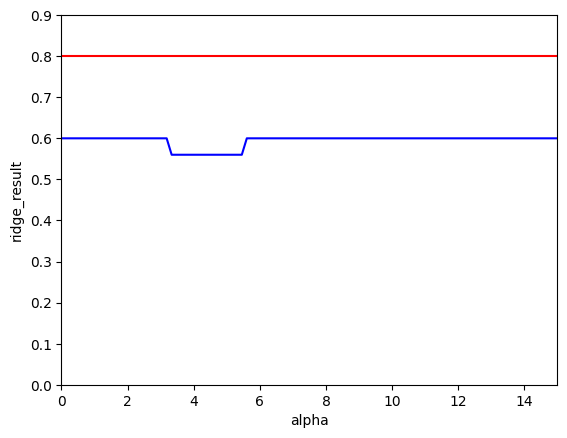

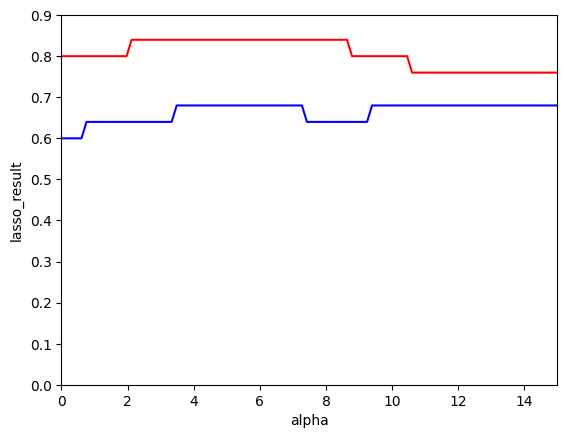

In [23]:
import matplotlib.pyplot as plt

plt.plot(alpha, ridge_result_val, 'r-', alpha, ridge_result_test, 'b-')
plt.xlabel('alpha')
plt.ylabel('ridge_result')
plt.axis([0, 15, 0, 0.9])
plt.show()

plt.plot(alpha, lasso_result_val, 'r-', alpha, lasso_result_test, 'b-')
plt.xlabel('alpha')
plt.ylabel('lasso_result')
plt.axis([0, 15, 0, 0.9])
plt.show()

# Best Model

In [24]:
# Select best model and alpha
lasso_alpha = 7
lasso = Lasso(alpha = lasso_alpha)

# Fit and Interpret
lasso.fit(X, y)
print(f'lasso.intercept_: {lasso.intercept_}\nlasso.coef_ \n{lasso.coef_}\n')

# Predict and Submit
df_group['lasso_predict'] = lasso.predict(X)
df_group['lasso_rank'] = df_group['lasso_predict'].rank(method='first', ascending=True).astype('int16')
template['ranking'] = df_group['lasso_rank']
template.to_csv('./drive/MyDrive/data/20182658.csv')

# Evaluate
tmp1, tmp2 = eval_val_test(template)
print(f'Validation Accuracy: {tmp1}\nTest Accuracy: {tmp2}')

lasso.intercept_: 607.9883086684201
lasso.coef_ 
[   0.          745.99940026    0.            0.            0.
   -0.            0.            0.           -0.            0.
 -548.10900342]

Validation Accuracy: 0.84
Test Accuracy: 0.68
